In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df_og = pd.read_csv(
    '/Volumes/T7_shield/CryptoVision/Data/Images/Datasets/v3.0.0/image_catalog.csv'
)

df_clean = pd.read_csv(
    '/Volumes/T7_shield/CryptoVision/Data/Images/Datasets/v3.0.0/image_catalog_clean.csv'
)

def clean_dataframe(df, sample_limit):
    # Rmv duplicates
    df = df.drop_duplicates(subset='hash', keep='first')

    # Rmv Species with less than few images
    df = df[df['species'].map(df['species'].value_counts()) > sample_limit]
    
    df.reset_index(drop=True, inplace=True)
    
    return df

df_clean = clean_dataframe(df_clean, 90)

df_og = clean_dataframe(df_og, 50)

df_og = df_og[df_og['species'].isin(df_clean['species'].unique())]

print(df_clean.shape)
print(df_og.shape)

(28386, 20)
(29370, 20)


In [4]:
sp_list = [
    'Apogonidae_Apogon_binotatus',
    'Apogonidae_Apogon_maculatus' ,
    'Apogonidae_Cheilodipterus_quinquelineatus' ,
    'Apogonidae_Fowleria_vaiulae' ,
    'Apogonidae_Ostorhinchus_angustatus' ,
    'Apogonidae_Ostorhinchus_compressus' ,
    'Apogonidae_Ostorhinchus_cyanosoma' ,
    'Apogonidae_Ostorhinchus_nigrofasciatus' ,
    'Apogonidae_Pristiapogon_exostigma' ,
    'Apogonidae_Pristiapogon_kallopterus' ,
    'Apogonidae_Taeniamia_fucata' ,
    'Blenniidae_Cirripectes_variolosus' ,
    'Blenniidae_Crossosalarias_macrospilus',
    'Blenniidae_Ecsenius_bicolor',
    'Blenniidae_Ecsenius_pulcher',
    'Blenniidae_Ecsenius_stictus',
    'Blenniidae_Enchelyurus_ater',
    'Blenniidae_Glyptoparus_delicatulus',
    'Blenniidae_Plagiotremus_rhinorhynchus' ,
    'Blenniidae_Salarias_alboguttatus' ,
    'Chaenopsidae_Acanthemblemaria_aspera' ,
    'Chaenopsidae_Acanthemblemaria_spinosa' ,
    'Chaetodontidae_Chaetodon_citrinellus' ,
    'Chaetodontidae_Chaetodon_quadrimaculatus' ,
    'Cirrhitidae_Cirrhitichthys_oxycephalus' ,
    'Cirrhitidae_Neocirrhites_armatus' ,
    'Cirrhitidae_Paracirrhites_arcatus' ,
    'Creediidae_Limnichthys_nitidus' ,
    'Gobiidae_Amblygobius_phalaena' ,
    'Gobiidae_Coryphopterus_personatus' ,
    'Gobiidae_Ctenogobiops_mitodes' ,
    'Gobiidae_Eviota_afelei' ,
    'Gobiidae_Eviota_albolineata' ,
    'Gobiidae_Eviota_atriventris' ,
    'Gobiidae_Eviota_infulata' ,
    'Gobiidae_Eviota_melasma' ,
    'Gobiidae_Eviota_prasites' ,
    'Gobiidae_Eviota_sebreei' ,
    'Gobiidae_Gobiodon_histrio' ,
    'Gobiidae_Gobiodon_quinquestrigatus' ,
    'Gobiidae_Paragobiodon_lacunicolus' ,
    'Gobiidae_Paragobiodon_modestus' ,
    'Gobiidae_Pleurosicya_labiata' ,
    'Gobiidae_Priolepis_semidoliatus' ,
    'Gobiidae_Trimma_capostriatum' ,
    'Gobiidae_Trimma_lantana' ,
    'Gobiidae_Trimma_macrophthalmus' ,
    'Labridae_Halichoeres_claudia' ,
    'Labridae_Pseudocheilinus_tetrataenia' ,
    'Plesiopidae_Plesiops_coeruleolineatus' ,
    'Pomacentridae_Chrysiptera_caesifrons' ,
    'Pseudochromidae_Pseudochromis_flammicauda' ,
    'Scorpaenidae_Caracanthus_unipinna' ,
    'Scorpaenidae_Scorpaenodes_kelloggi' ,
    'Scorpaenidae_Sebastapistes_fowleri' ,
    'Scorpaenidea_Scorpaenodes_caribbaeus' ,
    'Tripterygiidae_Enneanectes_altivelis' ,
    'Tripterygiidae_Enneanectes_atrorus' ,
    'Tripterygiidae_Enneanectes_matador' ,
    'Tripterygiidae_Enneapterygius_similis' ,
    'Tripterygiidae_Enneapterygius_tutuilae' ,
    'Tripterygiidae_Ucla_xenogrammus',
]

In [5]:
def was_clean(sp, sp_list):
    if sp in sp_list:
        return True
    else:
        return False
    
df_clean['cleaned'] = df_clean['folder_label'].apply(lambda x: was_clean(x, sp_list))

df_clean.head()

,image_path,folder_label,family,genus,species,source,hash,width,height,aspect_ratio,...,mode,file_size,brightness,contrast,entropy,blur_score,dominant_color,flag_small,duplicates,cleaned
0,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Apogonidae_Apogon_binotatus,Apogonidae,Apogon,Apogon binotatus,sjb,c0cc3f3fc0e80f87,4288,2848,1.51,...,RGB,762101,23.45,37.39,6.45205,32.26,"(33, 18, 18)",False,False,True
1,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Apogonidae_Apogon_binotatus,Apogonidae,Apogon,Apogon binotatus,sjb,feb0c0ca3f34b069,4288,2848,1.51,...,RGB,786988,190.42,58.88,8.36385,38.03,"(203, 187, 180)",False,False,True
2,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Apogonidae_Apogon_binotatus,Apogonidae,Apogon,Apogon binotatus,sjb,c03e3b7cc03f2f48,4288,2848,1.51,...,RGB,739710,27.35,45.44,6.60201,31.35,"(33, 26, 22)",False,False,True
3,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Apogonidae_Apogon_binotatus,Apogonidae,Apogon,Apogon binotatus,sjb,c4c83f37c0f00f4f,4288,2848,1.51,...,RGB,950312,36.47,49.88,7.22632,48.99,"(48, 31, 29)",False,False,True
4,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Apogonidae_Apogon_binotatus,Apogonidae,Apogon,Apogon binotatus,sjb,b590c0e93ff6c0a9,4288,2848,1.51,...,RGB,796139,195.03,51.93,8.21723,38.42,"(194, 199, 191)",False,False,True


In [10]:
df_clean[(~df_clean['cleaned']) & (df_clean['source'] == 'inat')]['species'].nunique()

50

In [11]:
df_clean[df_clean['source'] == 'inat']['cleaned'].value_counts()

cleaned
False    9274
True     5269
Name: count, dtype: int64

In [3]:
df_og.shape[0] - df_clean.shape[0]

984

In [4]:
from cryptovision.tools import CryptoVisionAI


labels = {
    'family': sorted(df_clean['family'].unique().tolist()),
    'genus': sorted(df_clean['genus'].unique().tolist()),
    'species': sorted(df_clean['species'].unique().tolist()),
}

ai = CryptoVisionAI(
    model_path = '/Users/leonardo/Documents/Projects/cryptovision/models/DataSetClean_S/model_trained.keras',
    family_names= labels['family'],
    genus_names= labels['genus'],
    species_names= labels['species'],
)

ai_og = CryptoVisionAI(
    model_path = '/Users/leonardo/Documents/Projects/cryptovision/models/DataSet_S/model_trained.keras',
    family_names= labels['family'],
    genus_names= labels['genus'],
    species_names= labels['species'],
)


2025-02-08 00:53:00.556 | INFO     | cryptovision.config:<module>:15 - PROJ_ROOT path is: /Users/leonardo/Documents/Projects/cryptovision
2025-02-08 00:53:01.057987: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-02-08 00:53:01.058012: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-02-08 00:53:01.058015: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-02-08 00:53:01.058032: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-08 00:53:01.058041: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


True Label: Fam Gobiidae | Gen: Eviota | Spec: Eviota teresae
Pred OG:    Fam Gobiidae | Gen: Eviota | Spec: Eviota albolineata [Confidence: (0.997, 0.975, 0.5312)]
Pred Clean: Fam Gobiidae | Gen: Eviota | Spec: Eviota albolineata [Confidence: (0.9976, 0.9756, 0.852)]


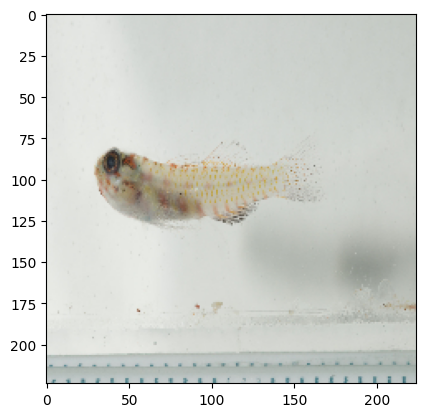

In [89]:
sample = df_clean[df_clean['genus'] == 'Eviota'].sample(1)

for row, data in sample.iterrows():
    
    print(f"True Label: Fam {data['family']} | Gen: {data['genus']} | Spec: {data['species']}")
    
    preds_og = ai_og.predict(data['image_path'])
    preds = ai.predict(data['image_path'])
    
    print(f"Pred OG:    Fam {preds_og[0]} | Gen: {preds_og[1]} | Spec: {preds_og[2]} [Confidence: {ai_og.confidence}]")
    print(f"Pred Clean: Fam {preds[0]} | Gen: {preds[1]} | Spec: {preds[2]} [Confidence: {ai.confidence}]")
    
plt.imshow(ai.image)
plt.show()



In [25]:
from tqdm import tqdm
import cryptovision.tools as tools

train_df, val_df, test_df = tools.split_dataframe(
    df_clean, 
    test_size=.15, 
    val_size=.15,
    stratify_by='species',
    random_state=42
)

test_ds = tools.tensorflow_dataset(
    test_df,
    batch_size=32,
)


In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

all_fam_true = []
all_fam_pred = []
all_fam_conf = []

for batch in test_ds:
    images, labels = batch
    
    fam_true = tf.argmax(labels['family'], axis=1).numpy()
    preds = ai.model.predict(images, verbose=0)
    
    fam_pred = tf.argmax(preds[0], axis=1)
    fam_conf = tf.reduce_max(preds[0], axis=1)
    
    all_fam_true.extend(fam_true)
    all_fam_pred.extend(fam_pred)
    all_fam_conf.extend(fam_conf)
    

2025-02-08 00:55:35.019793: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:605: Filling up shuffle buffer (this may take a while): 99 of 4258
2025-02-08 00:55:38.049911: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-02-08 00:56:03.966406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [142]:
predictions_og = {
    'fam_pred': [],
    'gen_pred': [],
    'spe_pred': [],
    'fam_conf': [],
    'gen_conf': [],
    'spe_conf': [],
}

for row, data in tqdm(test_df.iterrows(), total=test_df.shape[0]):
    
    preds = ai_og.predict(data['image_path'])
    predictions_og['fam_pred'].append(preds[0])
    predictions_og['gen_pred'].append(preds[1])
    predictions_og['spe_pred'].append(preds[2])

    predictions_og['fam_conf'].append(ai.confidence[0])
    predictions_og['gen_conf'].append(ai.confidence[1])
    predictions_og['spe_conf'].append(ai.confidence[2])

100%|██████████| 4258/4258 [04:40<00:00, 15.20it/s]


In [143]:

print(sum(predictions_og['spe_conf']) / len(predictions_og['spe_conf']))
print(sum(predictions['spe_conf']) / len(predictions['spe_conf']))

0.6396484375
0.6299725017843251


In [147]:
from sklearn.metrics import accuracy_score, average_precision_score


print('Accuracy OG:', accuracy_score(test_df['species'], predictions_og['spe_pred']))
print('Accuracy CL:', accuracy_score(test_df['species'], predictions['spe_pred']))

Accuracy OG: 0.7235791451385627
Accuracy CL: 0.7350868952559887


In [148]:
test_df.columns

Index(['image_path', 'folder_label', 'family', 'genus', 'species', 'source',
       'hash', 'width', 'height', 'aspect_ratio', 'format', 'mode',
       'file_size', 'brightness', 'contrast', 'entropy', 'blur_score',
       'dominant_color', 'flag_small', 'duplicates', 'source_path'],
      dtype='object')

In [154]:
df_rst = test_df.copy()

df_rst.reset_index(inplace=True, drop=True)

for key in predictions_og.keys():
    df_rst[f"{key}_og"] = predictions_og[key]
    
for key in predictions.keys():
    df_rst[key] = predictions[key]

df_rst.head(10)

,image_path,folder_label,family,genus,species,source,hash,width,height,aspect_ratio,...,spe_pred_og,fam_conf_og,gen_conf_og,spe_conf_og,fam_pred,gen_pred,spe_pred,fam_conf,gen_conf,spe_conf
0,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Eviota_atriventris,Gobiidae,Eviota,Eviota atriventris,inat,8d1a2e3978d3d30e,700,701,1.00,...,Eviota atriventris,0.862793,0.858887,0.639648,Gobiidae,Eviota,Eviota atriventris,0.762695,0.883789,0.991699
1,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Nemateleotris_magnifica,Gobiidae,Nemateleotris,Nemateleotris magnifica,inat,ac61c0369d4e673b,1500,1000,1.50,...,Nemateleotris magnifica,0.862793,0.858887,0.639648,Gobiidae,Nemateleotris,Nemateleotris magnifica,0.778809,0.910645,0.886719
2,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Istigobius_decoratus,Gobiidae,Istigobius,Istigobius decoratus,web,d4c74e38676c18b3,500,333,1.50,...,Istigobius decoratus,0.862793,0.858887,0.639648,Gobiidae,Istigobius,Istigobius decoratus,0.528320,0.607422,0.608398
3,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Labridae_Pseudocheilinus_hexataenia,Labridae,Pseudocheilinus,Pseudocheilinus hexataenia,sjb,ea3787c21b4f0f30,4288,2848,1.51,...,Pseudocheilinus hexataenia,0.862793,0.858887,0.639648,Labridae,Pseudocheilinus,Pseudocheilinus hexataenia,0.965332,0.987793,0.691406
4,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Pomacentridae_Chromis_margaritifer,Pomacentridae,Chromis,Chromis margaritifer,inat,a3dc3e32e8259e16,880,495,1.78,...,Gomphosus varius,0.862793,0.858887,0.639648,Pomacanthidae,Gomphosus,Pomacanthus maculosus,0.290039,0.373535,0.379639
5,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Gobiodon_quinquestrigatus,Gobiidae,Gobiodon,Gobiodon quinquestrigatus,sjb,e2b195ce6ab434c3,4288,2848,1.51,...,Gobiodon quinquestrigatus,0.862793,0.858887,0.639648,Gobiidae,Gobiodon,Gobiodon quinquestrigatus,0.894531,0.860840,0.750977
6,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,cbc,807cc7c73038cfc7,6240,4160,1.50,...,Acanthemblemaria aspera,0.862793,0.858887,0.639648,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,0.974609,0.911133,0.981445
7,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Pomacentridae_Pomacentrus_amboinensis,Pomacentridae,Pomacentrus,Pomacentrus amboinensis,web,d3de346c9a606d4c,1503,1052,1.43,...,Pomacentrus amboinensis,0.862793,0.858887,0.639648,Pomacentridae,Pomacentrus,Pomacentrus amboinensis,0.855469,0.816406,0.698730
8,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobbidae_Eviota_distigma,Gobbidae,Eviota,Eviota distigma,scls,be1bc1663e9bc064,4288,2848,1.51,...,Eviota distigma,0.862793,0.858887,0.639648,Gobiidae,Eviota,Eviota distigma,0.448486,0.789551,0.702637
9,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,web,9e81e32b5a3b0ec6,1200,800,1.50,...,Acanthemblemaria aspera,0.862793,0.858887,0.639648,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,0.979492,0.969238,0.885742


In [202]:
df_rst[df_rst['species'] == df_rst['spe_pred']].head(10)

,image_path,folder_label,family,genus,species,source,hash,width,height,aspect_ratio,...,spe_pred_og,fam_conf_og,gen_conf_og,spe_conf_og,fam_pred,gen_pred,spe_pred,fam_conf,gen_conf,spe_conf
0,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Eviota_atriventris,Gobiidae,Eviota,Eviota atriventris,inat,8d1a2e3978d3d30e,700,701,1.00,...,Eviota atriventris,0.862793,0.858887,0.639648,Gobiidae,Eviota,Eviota atriventris,0.762695,0.883789,0.991699
1,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Nemateleotris_magnifica,Gobiidae,Nemateleotris,Nemateleotris magnifica,inat,ac61c0369d4e673b,1500,1000,1.50,...,Nemateleotris magnifica,0.862793,0.858887,0.639648,Gobiidae,Nemateleotris,Nemateleotris magnifica,0.778809,0.910645,0.886719
2,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Istigobius_decoratus,Gobiidae,Istigobius,Istigobius decoratus,web,d4c74e38676c18b3,500,333,1.50,...,Istigobius decoratus,0.862793,0.858887,0.639648,Gobiidae,Istigobius,Istigobius decoratus,0.528320,0.607422,0.608398
3,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Labridae_Pseudocheilinus_hexataenia,Labridae,Pseudocheilinus,Pseudocheilinus hexataenia,sjb,ea3787c21b4f0f30,4288,2848,1.51,...,Pseudocheilinus hexataenia,0.862793,0.858887,0.639648,Labridae,Pseudocheilinus,Pseudocheilinus hexataenia,0.965332,0.987793,0.691406
5,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Gobiodon_quinquestrigatus,Gobiidae,Gobiodon,Gobiodon quinquestrigatus,sjb,e2b195ce6ab434c3,4288,2848,1.51,...,Gobiodon quinquestrigatus,0.862793,0.858887,0.639648,Gobiidae,Gobiodon,Gobiodon quinquestrigatus,0.894531,0.860840,0.750977
6,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,cbc,807cc7c73038cfc7,6240,4160,1.50,...,Acanthemblemaria aspera,0.862793,0.858887,0.639648,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,0.974609,0.911133,0.981445
7,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Pomacentridae_Pomacentrus_amboinensis,Pomacentridae,Pomacentrus,Pomacentrus amboinensis,web,d3de346c9a606d4c,1503,1052,1.43,...,Pomacentrus amboinensis,0.862793,0.858887,0.639648,Pomacentridae,Pomacentrus,Pomacentrus amboinensis,0.855469,0.816406,0.698730
8,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobbidae_Eviota_distigma,Gobbidae,Eviota,Eviota distigma,scls,be1bc1663e9bc064,4288,2848,1.51,...,Eviota distigma,0.862793,0.858887,0.639648,Gobiidae,Eviota,Eviota distigma,0.448486,0.789551,0.702637
9,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,web,9e81e32b5a3b0ec6,1200,800,1.50,...,Acanthemblemaria aspera,0.862793,0.858887,0.639648,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,0.979492,0.969238,0.885742
10,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Syngnathidae_Corythoichthys_flavofasciatus,Syngnathidae,Corythoichthys,Corythoichthys flavofasciatus,web,95353774570a791a,382,500,0.76,...,Enneapterygius tutuilae,0.862793,0.858887,0.639648,Syngnathidae,Corythoichthys,Corythoichthys flavofasciatus,0.228516,0.238770,0.163208


In [83]:
for key in predictions.keys():
    test_df[key] = predictions[key]

In [85]:
test_df.reset_index(inplace=True)
test_df.head()

,index,image_path,folder_label,family,genus,species,source,hash,width,height,...,dominant_color,flag_small,duplicates,source_path,fam_pred,gen_pred,spe_pred,fam_conf,gen_conf,spe_conf
0,11302,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Eviota_atriventris,Gobiidae,Eviota,Eviota atriventris,inat,8d1a2e3978d3d30e,700,701,...,"(51, 61, 53)",False,False,Sources/INaturaList/Species/v250128/images,Gobiidae,Eviota,Eviota atriventris,0.356934,0.533203,0.861816
1,13386,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Nemateleotris_magnifica,Gobiidae,Nemateleotris,Nemateleotris magnifica,inat,ac61c0369d4e673b,1500,1000,...,"(119, 130, 118)",False,False,Sources/INaturaList/Species/v250128/images,Gobiidae,Nemateleotris,Nemateleotris magnifica,0.862793,0.917969,0.890625
2,24074,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Istigobius_decoratus,Gobiidae,Istigobius,Istigobius decoratus,web,d4c74e38676c18b3,500,333,...,"(154, 162, 148)",False,False,Sources/Web/Species/v240712/uniques,Gobiidae,Istigobius,Istigobius decoratus,0.506836,0.647461,0.393555
3,4072,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Labridae_Pseudocheilinus_hexataenia,Labridae,Pseudocheilinus,Pseudocheilinus hexataenia,sjb,ea3787c21b4f0f30,4288,2848,...,"(146, 144, 134)",False,False,Sources/Lab/SJB/Processed/Species/v241226/uniques,Labridae,Pseudocheilinus,Pseudocheilinus hexataenia,0.965332,0.983398,0.692383
4,17052,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Pomacentridae_Chromis_margaritifer,Pomacentridae,Chromis,Chromis margaritifer,inat,a3dc3e32e8259e16,880,495,...,"(133, 162, 168)",False,False,Sources/INaturaList/Species/v250128/images,Labridae,Pomacanthus,Pomacanthus maculosus,0.412842,0.337402,0.374512


In [99]:
test_correct = test_df[test_df['species'] == test_df['spe_pred']]

test_correct.head(20)

,index,image_path,folder_label,family,genus,species,source,hash,width,height,...,dominant_color,flag_small,duplicates,source_path,fam_pred,gen_pred,spe_pred,fam_conf,gen_conf,spe_conf
0,11302,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Eviota_atriventris,Gobiidae,Eviota,Eviota atriventris,inat,8d1a2e3978d3d30e,700,701,...,"(51, 61, 53)",False,False,Sources/INaturaList/Species/v250128/images,Gobiidae,Eviota,Eviota atriventris,0.356934,0.533203,0.861816
1,13386,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Nemateleotris_magnifica,Gobiidae,Nemateleotris,Nemateleotris magnifica,inat,ac61c0369d4e673b,1500,1000,...,"(119, 130, 118)",False,False,Sources/INaturaList/Species/v250128/images,Gobiidae,Nemateleotris,Nemateleotris magnifica,0.862793,0.917969,0.890625
2,24074,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Istigobius_decoratus,Gobiidae,Istigobius,Istigobius decoratus,web,d4c74e38676c18b3,500,333,...,"(154, 162, 148)",False,False,Sources/Web/Species/v240712/uniques,Gobiidae,Istigobius,Istigobius decoratus,0.506836,0.647461,0.393555
3,4072,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Labridae_Pseudocheilinus_hexataenia,Labridae,Pseudocheilinus,Pseudocheilinus hexataenia,sjb,ea3787c21b4f0f30,4288,2848,...,"(146, 144, 134)",False,False,Sources/Lab/SJB/Processed/Species/v241226/uniques,Labridae,Pseudocheilinus,Pseudocheilinus hexataenia,0.965332,0.983398,0.692383
5,2974,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobiidae_Gobiodon_quinquestrigatus,Gobiidae,Gobiodon,Gobiodon quinquestrigatus,sjb,e2b195ce6ab434c3,4288,2848,...,"(204, 201, 202)",False,False,Sources/Lab/SJB/Processed/Species/v241226/uniques,Gobiidae,Gobiodon,Gobiodon quinquestrigatus,0.820801,0.802246,0.518066
6,7326,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,cbc,807cc7c73038cfc7,6240,4160,...,"(217, 215, 210)",False,False,Sources/Lab/CBC24/Processed/Species/v250115/im...,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,0.963379,0.839844,0.965820
7,26842,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Pomacentridae_Pomacentrus_amboinensis,Pomacentridae,Pomacentrus,Pomacentrus amboinensis,web,d3de346c9a606d4c,1503,1052,...,"(104, 99, 79)",False,False,Sources/Web/Species/v240712/uniques,Pomacentridae,Pomacentrus,Pomacentrus amboinensis,0.784180,0.808105,0.788574
8,6698,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Gobbidae_Eviota_distigma,Gobbidae,Eviota,Eviota distigma,scls,be1bc1663e9bc064,4288,2848,...,"(169, 196, 217)",False,False,Sources/Lab/SCLS/Processed/Species/v250115/images,Gobiidae,Eviota,Eviota distigma,0.515137,0.778809,0.670898
9,22685,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Chaenopsidae_Acanthemblemaria_aspera,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,web,9e81e32b5a3b0ec6,1200,800,...,"(135, 98, 75)",False,False,Sources/Web/Species/v240712/uniques,Chaenopsidae,Acanthemblemaria,Acanthemblemaria aspera,0.966797,0.924805,0.843262
10,27452,/Volumes/T7_shield/CryptoVision/Data/Images/So...,Syngnathidae_Corythoichthys_flavofasciatus,Syngnathidae,Corythoichthys,Corythoichthys flavofasciatus,web,95353774570a791a,382,500,...,"(167, 151, 102)",False,False,Sources/Web/Species/v240712/uniques,Gobiidae,Eviota,Corythoichthys flavofasciatus,0.277344,0.205444,0.100708


<Axes: xlabel='family', ylabel='fam_conf'>

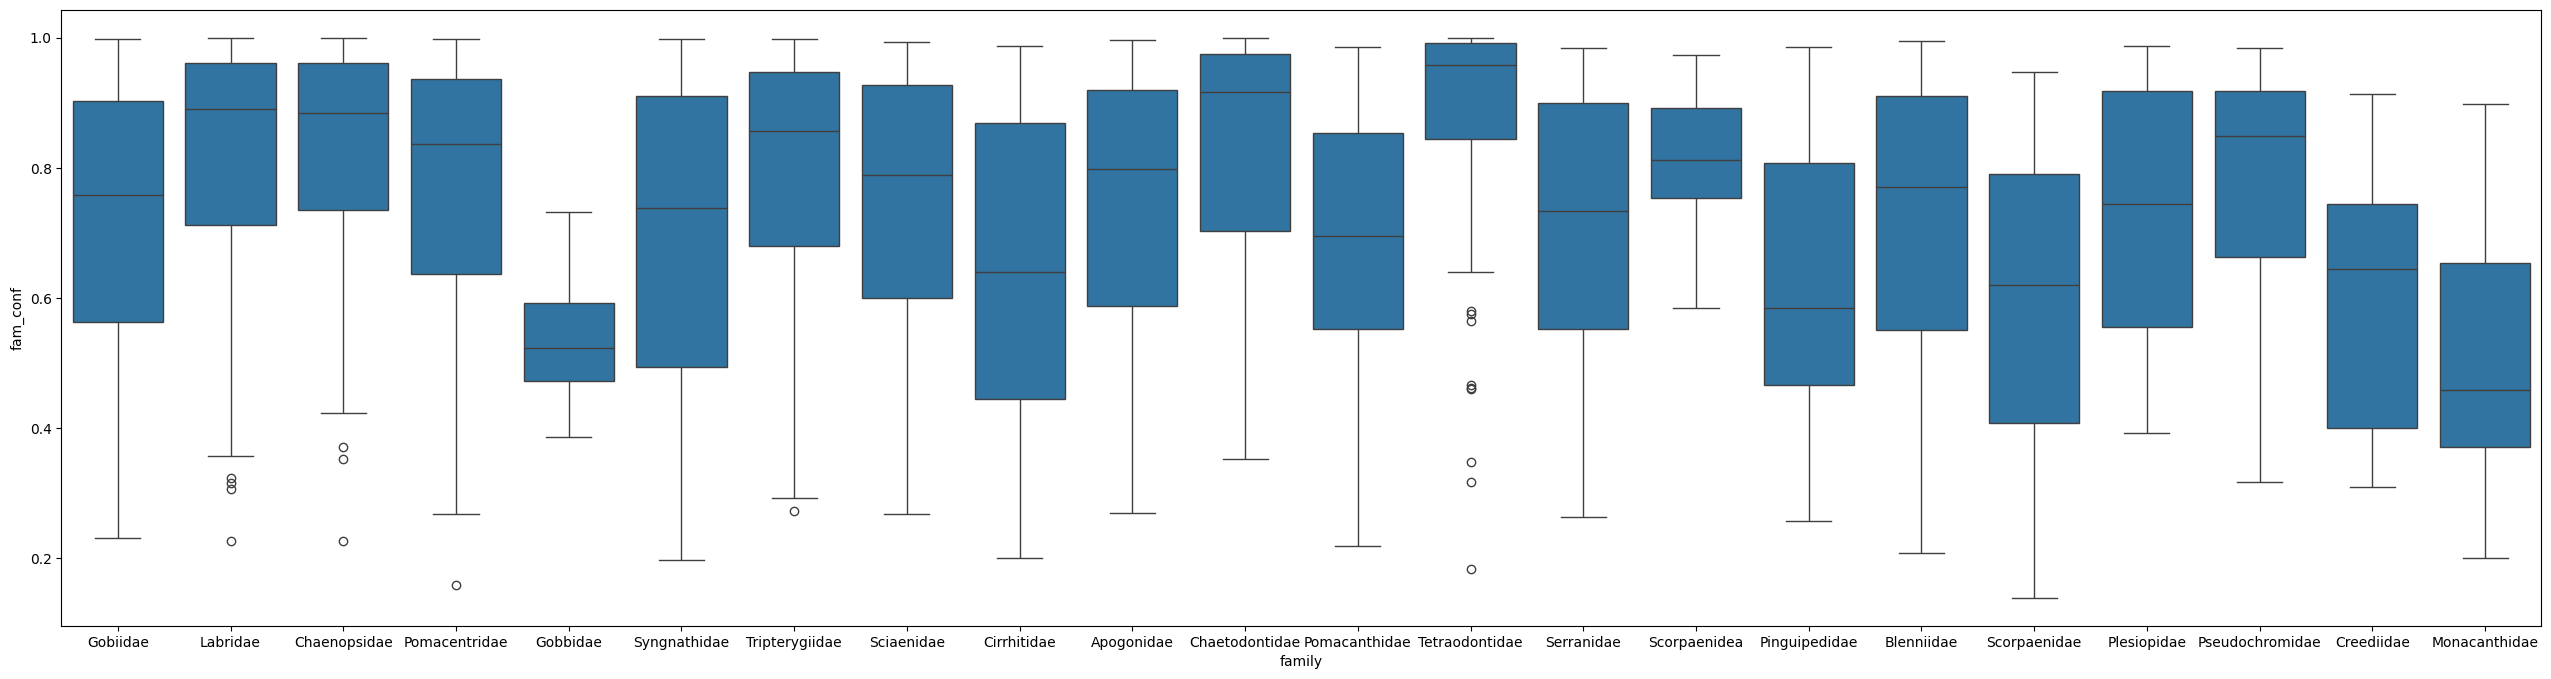

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(32, 8))
sns.boxplot(x='family', y='fam_conf', data=test_correct)

<Axes: >

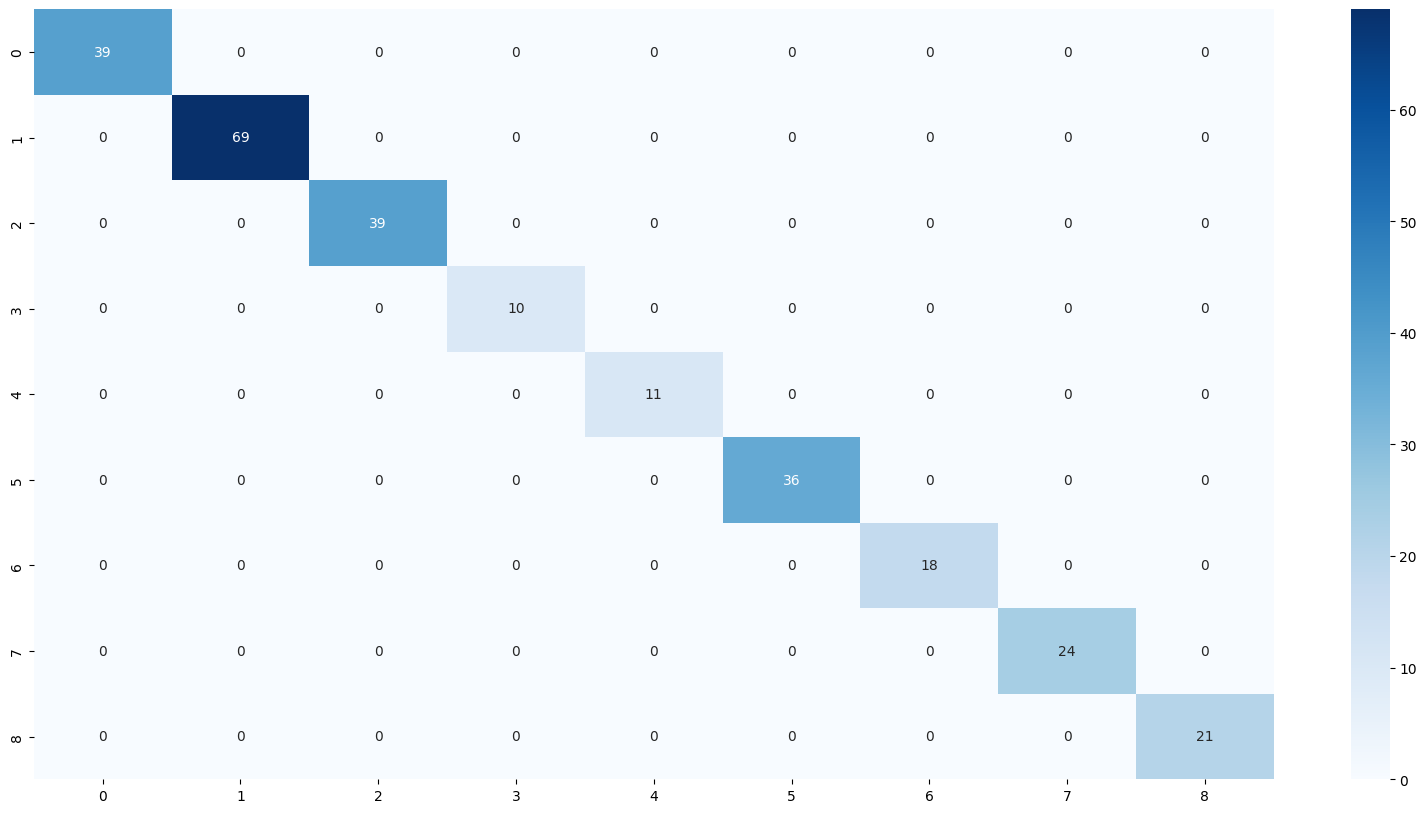

In [102]:
from sklearn.metrics import classification_report, confusion_matrix

eviotas = test_correct[test_correct['genus'] == 'Eviota']

conf_mtx = confusion_matrix(eviotas['species'], eviotas['spe_pred'])

plt.figure(figsize=(20, 10))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap='Blues')

<Axes: xlabel='species', ylabel='spe_conf'>

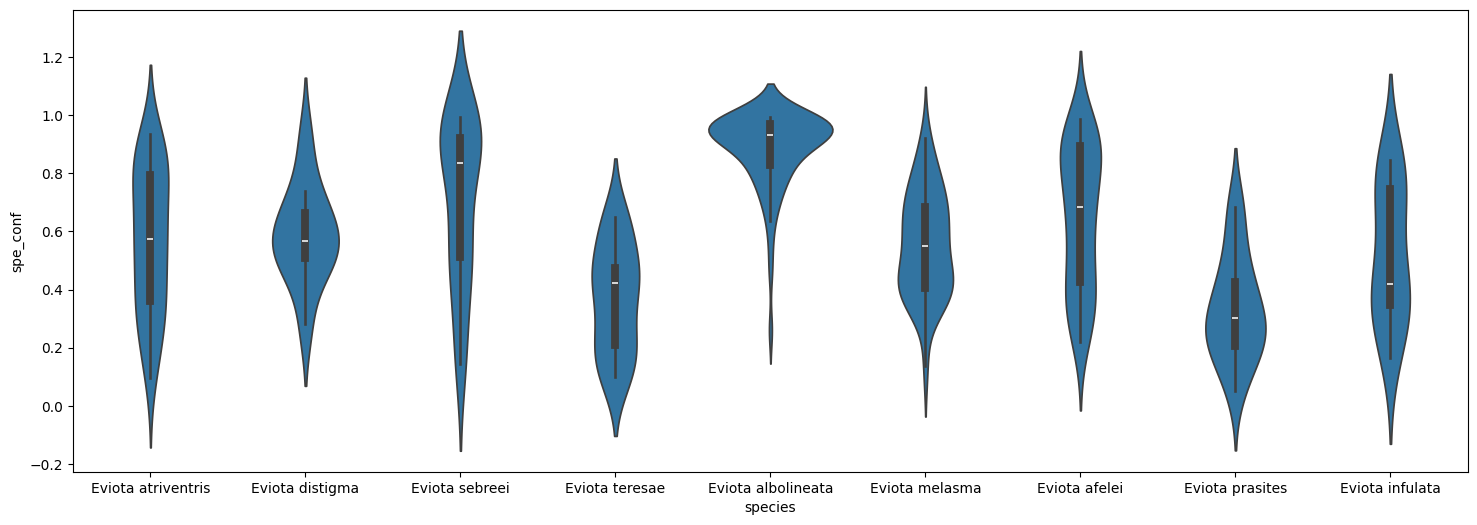

In [109]:
plt.figure(figsize=(18, 6))
sns.violinplot(x='species', y='spe_conf', data=eviotas)

In [114]:
report = classification_report(test_df['species'], test_df['spe_pred'], target_names=labels['species'], output_dict=True)
print(report)

{'Acanthemblemaria aspera': {'precision': 0.4797297297297297, 'recall': 0.9102564102564102, 'f1-score': 0.6283185840707964, 'support': 78.0}, 'Acanthemblemaria spinosa': {'precision': 0.6129032258064516, 'recall': 0.5757575757575758, 'f1-score': 0.59375, 'support': 33.0}, 'Amblygobius phalaena': {'precision': 0.6111111111111112, 'recall': 0.4230769230769231, 'f1-score': 0.5, 'support': 26.0}, 'Apogon binotatus': {'precision': 0.7297297297297297, 'recall': 0.9310344827586207, 'f1-score': 0.8181818181818182, 'support': 29.0}, 'Apogon maculatus': {'precision': 0.8157894736842105, 'recall': 0.6888888888888889, 'f1-score': 0.7469879518072289, 'support': 45.0}, 'Canthigaster solandri': {'precision': 0.6690647482014388, 'recall': 0.8532110091743119, 'f1-score': 0.75, 'support': 109.0}, 'Caracanthus maculatus': {'precision': 0.6857142857142857, 'recall': 0.8275862068965517, 'f1-score': 0.75, 'support': 29.0}, 'Caracanthus unipinna': {'precision': 0.9285714285714286, 'recall': 0.684210526315789

/Users/leonardo/miniconda3/envs/cvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/leonardo/miniconda3/envs/cvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/leonardo/miniconda3/envs/cvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [119]:
import pandas as pd

rpt = pd.DataFrame(report).transpose()

rpt = rpt.reset_index().rename(columns={'index':'species'})

rpt.head(10)

,species,precision,recall,f1-score,support
0,Acanthemblemaria aspera,0.479730,0.910256,0.628319,78.0
1,Acanthemblemaria spinosa,0.612903,0.575758,0.593750,33.0
2,Amblygobius phalaena,0.611111,0.423077,0.500000,26.0
3,Apogon binotatus,0.729730,0.931034,0.818182,29.0
4,Apogon maculatus,0.815789,0.688889,0.746988,45.0
5,Canthigaster solandri,0.669065,0.853211,0.750000,109.0
6,Caracanthus maculatus,0.685714,0.827586,0.750000,29.0
7,Caracanthus unipinna,0.928571,0.684211,0.787879,19.0
8,Centropyge bispinosa,0.760000,0.730769,0.745098,52.0
9,Centropyge flavissima,0.891892,0.785714,0.835443,42.0


TypeError: matplotlib.axes._axes.Axes.bar() got multiple values for keyword argument 'x'

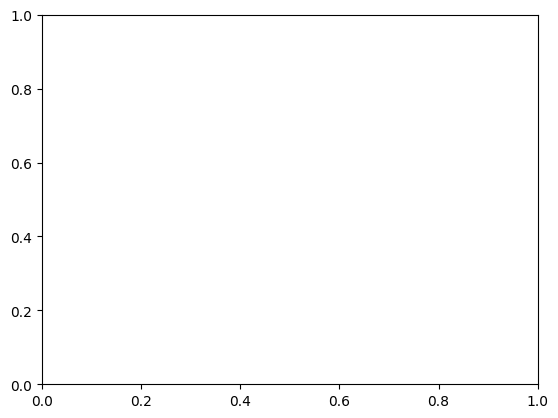

In [121]:
# bar plot species vs precision
import pandas as pd
import matplotlib.pyplot as plt

